In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [13]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'paper_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [14]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


## Generating a dataset

In [16]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.520437479019165
 Validation loss after 0 equals 1.5660126209259033


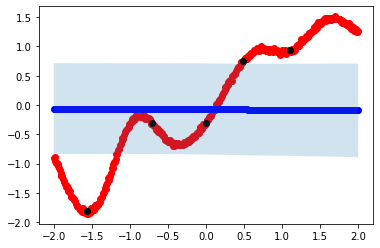

  2%|▎         | 5000/200000 [01:16<51:47, 62.75it/s]  

Mean loss at epoch 5000 : 1.2031501531600952
 Validation loss after 5000 equals 0.8688085079193115


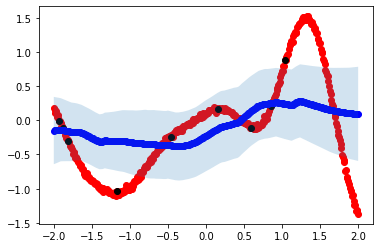

  5%|▍         | 9998/200000 [02:29<47:15, 67.00it/s]  

Mean loss at epoch 10000 : 1.1746541261672974
 Validation loss after 10000 equals 0.39569565653800964


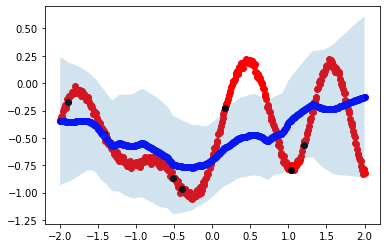

  7%|▋         | 14998/200000 [03:50<44:27, 69.36it/s]  

Mean loss at epoch 15000 : 0.9781573414802551
 Validation loss after 15000 equals 0.8023670315742493


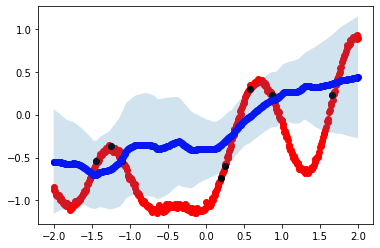

 10%|▉         | 19996/200000 [05:04<41:52, 71.64it/s]  

Mean loss at epoch 20000 : 0.7442970275878906
 Validation loss after 20000 equals 0.7380635738372803


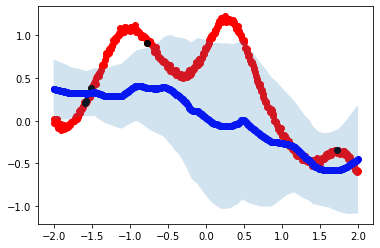

 12%|█▏        | 24999/200000 [06:20<42:40, 68.34it/s]  

Mean loss at epoch 25000 : 0.40850552916526794
 Validation loss after 25000 equals 1.0679864883422852


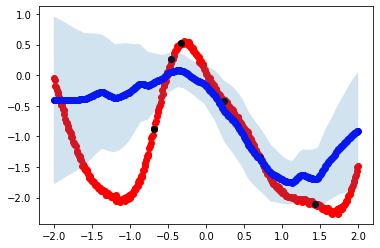

 15%|█▍        | 29997/200000 [07:37<1:09:43, 40.63it/s]

Mean loss at epoch 30000 : 0.38516420125961304
 Validation loss after 30000 equals 0.7124159932136536


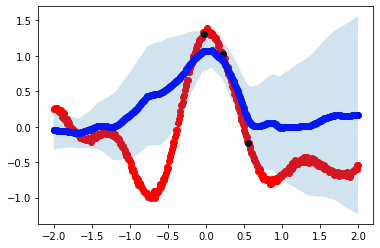

 17%|█▋        | 34997/200000 [08:56<38:49, 70.82it/s]  

Mean loss at epoch 35000 : 0.715499222278595
 Validation loss after 35000 equals 1.4676884412765503


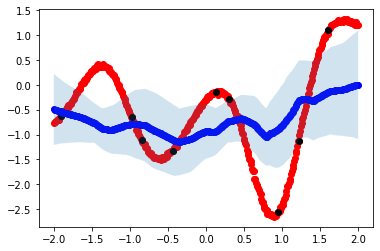

 20%|█▉        | 39997/200000 [10:11<41:19, 64.53it/s]  

Mean loss at epoch 40000 : 0.5457417964935303
 Validation loss after 40000 equals 1.1074298620224


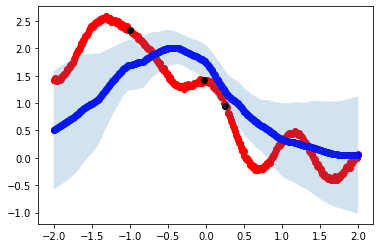

 22%|██▏       | 44998/200000 [11:25<38:31, 67.04it/s]  

Mean loss at epoch 45000 : 0.5160104036331177
 Validation loss after 45000 equals 0.37826648354530334


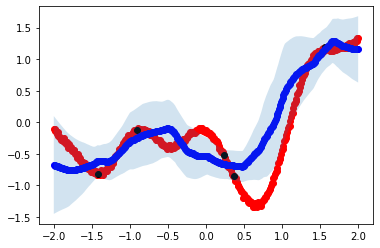

 25%|██▍       | 49998/200000 [12:36<37:27, 66.73it/s]

Mean loss at epoch 50000 : 0.34879472851753235
 Validation loss after 50000 equals 3.3351428508758545


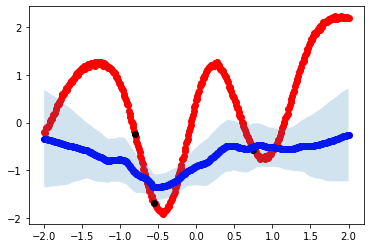

 27%|██▋       | 54995/200000 [13:51<34:08, 70.80it/s]

Mean loss at epoch 55000 : 0.5991696119308472
 Validation loss after 55000 equals 0.845986545085907


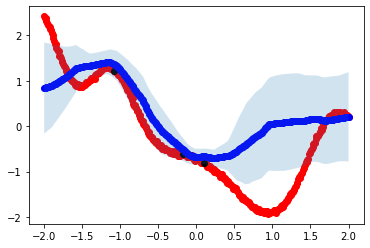

 30%|██▉       | 59999/200000 [15:04<34:01, 68.56it/s]

Mean loss at epoch 60000 : 0.7560802698135376
 Validation loss after 60000 equals 1.4307423830032349


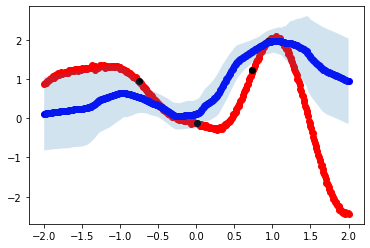

 32%|███▎      | 65000/200000 [16:20<40:28, 55.60it/s]  

Mean loss at epoch 65000 : 0.38467103242874146
 Validation loss after 65000 equals 0.7350852489471436


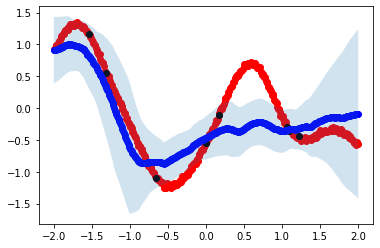

 35%|███▍      | 69995/200000 [17:36<33:01, 65.59it/s]  

Mean loss at epoch 70000 : 0.6013454794883728
 Validation loss after 70000 equals 1.358278512954712


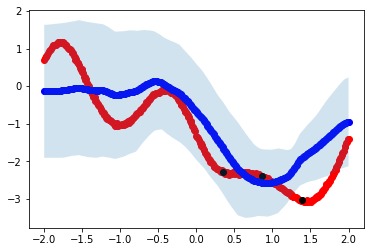

 37%|███▋      | 74998/200000 [18:54<32:41, 63.73it/s]

Mean loss at epoch 75000 : 0.5020226836204529
 Validation loss after 75000 equals 0.6287389993667603


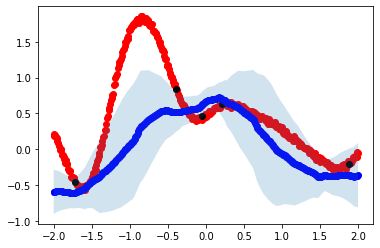

 40%|███▉      | 79996/200000 [20:10<28:40, 69.73it/s]

Mean loss at epoch 80000 : 0.3851456940174103
 Validation loss after 80000 equals 1.025822401046753


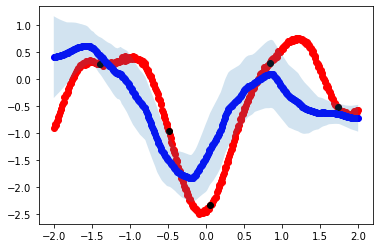

 42%|████▎     | 85000/200000 [21:23<33:37, 57.00it/s]

Mean loss at epoch 85000 : 0.22617194056510925
 Validation loss after 85000 equals 0.40458813309669495


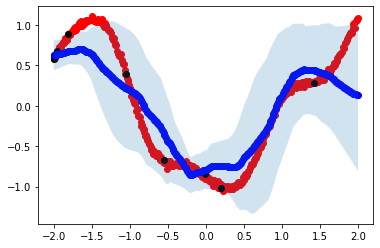

 45%|████▌     | 90000/200000 [22:35<26:23, 69.48it/s]

Mean loss at epoch 90000 : 0.5844610333442688
 Validation loss after 90000 equals 0.8080288171768188


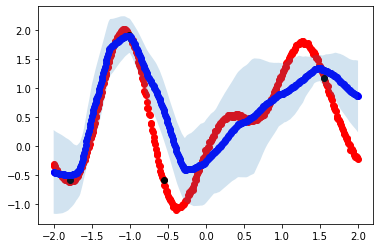

 48%|████▊     | 95000/200000 [23:57<25:13, 69.40it/s]  

Mean loss at epoch 95000 : 0.44562292098999023
 Validation loss after 95000 equals 0.6749527454376221


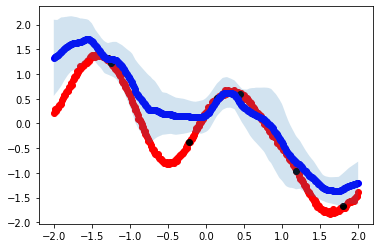

 50%|████▉     | 99999/200000 [25:13<23:50, 69.91it/s]

Mean loss at epoch 100000 : 0.7004900574684143
 Validation loss after 100000 equals 2.854518413543701


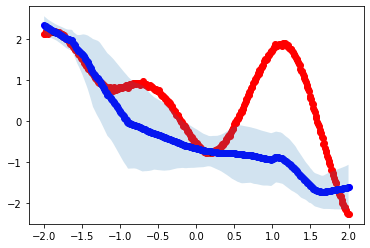

 52%|█████▏    | 104995/200000 [26:32<23:32, 67.25it/s]

Mean loss at epoch 105000 : 0.6614059209823608
 Validation loss after 105000 equals 0.7621337175369263


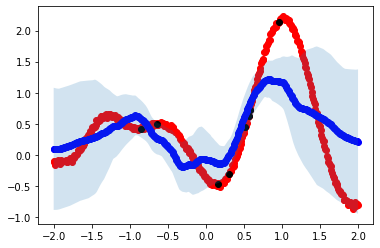

 55%|█████▍    | 109995/200000 [27:49<21:49, 68.74it/s]

Mean loss at epoch 110000 : 0.38299521803855896
 Validation loss after 110000 equals 1.2497131824493408


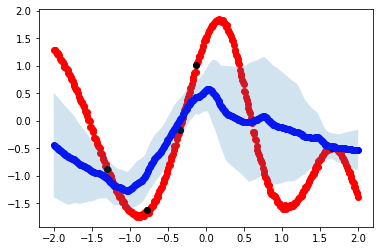

 57%|█████▋    | 114994/200000 [29:26<22:33, 62.81it/s]  

Mean loss at epoch 115000 : 0.40246522426605225
 Validation loss after 115000 equals 1.0927103757858276


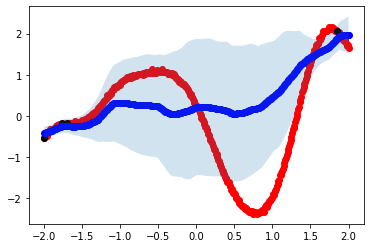

 60%|█████▉    | 119995/200000 [30:49<20:09, 66.15it/s]  

Mean loss at epoch 120000 : 0.22987931966781616
 Validation loss after 120000 equals 0.3669358491897583


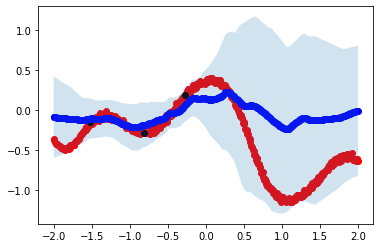

 62%|██████▏   | 124997/200000 [32:05<19:48, 63.11it/s]

Mean loss at epoch 125000 : 0.5279263854026794
 Validation loss after 125000 equals 0.6558811664581299


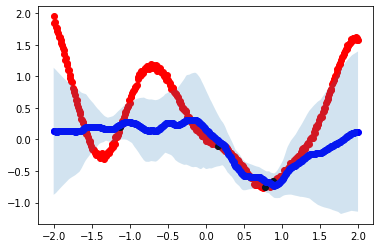

 65%|██████▌   | 130000/200000 [33:35<19:30, 59.81it/s]  

Mean loss at epoch 130000 : 0.46518129110336304
 Validation loss after 130000 equals 0.9249074459075928


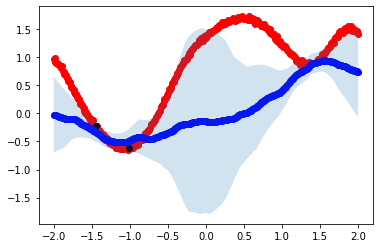

 67%|██████▋   | 134996/200000 [35:03<17:39, 61.34it/s]  

Mean loss at epoch 135000 : 0.3395892381668091
 Validation loss after 135000 equals 0.4215823709964752


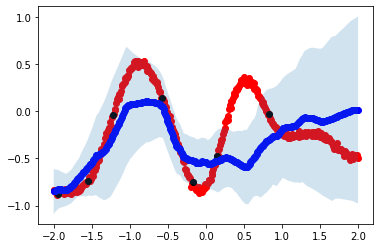

 70%|██████▉   | 139995/200000 [36:22<14:50, 67.40it/s]

Mean loss at epoch 140000 : 1.0351535081863403
 Validation loss after 140000 equals 0.9804242849349976


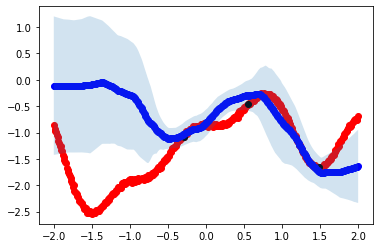

 72%|███████▏  | 144994/200000 [37:56<13:17, 69.00it/s]  

Mean loss at epoch 145000 : 0.4748702347278595
 Validation loss after 145000 equals 0.8858988285064697


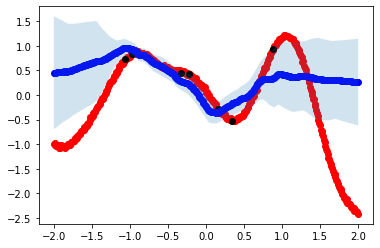

 75%|███████▍  | 149995/200000 [39:16<12:53, 64.63it/s]  

Mean loss at epoch 150000 : 0.4380476772785187
 Validation loss after 150000 equals 0.4522082507610321


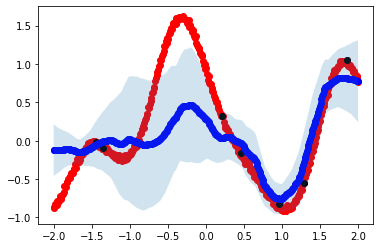

 77%|███████▋  | 154995/200000 [40:31<10:50, 69.16it/s]

Mean loss at epoch 155000 : 1.436305046081543
 Validation loss after 155000 equals 1.299933671951294


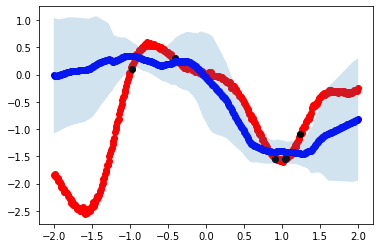

 80%|███████▉  | 159996/200000 [41:53<09:58, 66.84it/s]

Mean loss at epoch 160000 : 0.27152228355407715
 Validation loss after 160000 equals 0.7403781414031982


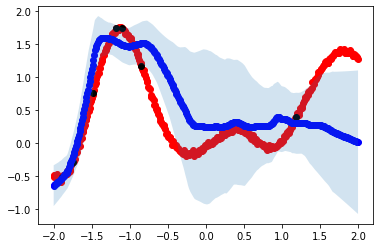

 82%|████████▏ | 164999/200000 [43:12<08:57, 65.06it/s]

Mean loss at epoch 165000 : 0.7338449954986572
 Validation loss after 165000 equals 0.6893568634986877


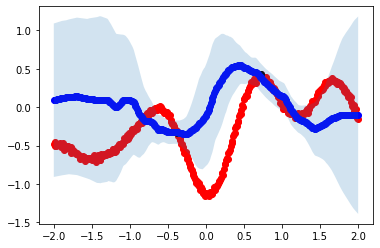

 85%|████████▍ | 169994/200000 [44:36<07:54, 63.24it/s]  

Mean loss at epoch 170000 : 0.5442022085189819
 Validation loss after 170000 equals 0.6191347241401672


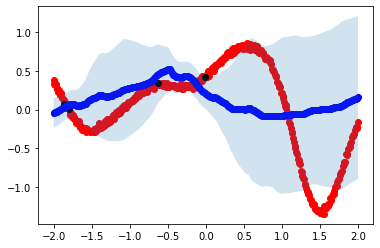

 87%|████████▋ | 174994/200000 [45:57<06:33, 63.60it/s]

Mean loss at epoch 175000 : 0.29826900362968445
 Validation loss after 175000 equals 0.7779608964920044


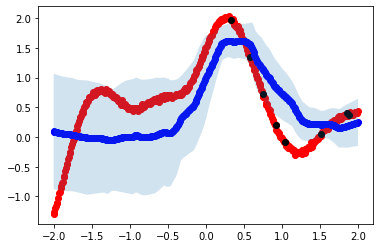

 90%|████████▉ | 179994/200000 [47:27<05:09, 64.73it/s]

Mean loss at epoch 180000 : 0.47689491510391235
 Validation loss after 180000 equals 0.8952189683914185


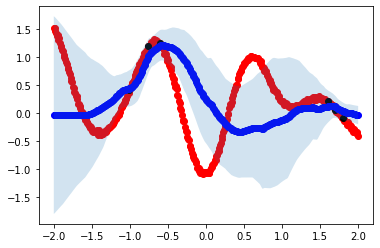

 92%|█████████▏| 184999/200000 [48:57<04:00, 62.32it/s]

Mean loss at epoch 185000 : 0.41110947728157043
 Validation loss after 185000 equals 0.4613775610923767


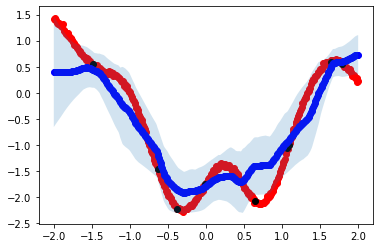

 95%|█████████▍| 189996/200000 [50:16<02:40, 62.18it/s]

Mean loss at epoch 190000 : -0.03949961066246033
 Validation loss after 190000 equals 0.24944984912872314


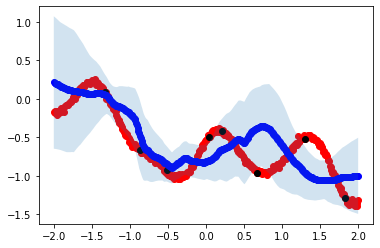

 97%|█████████▋| 194995/200000 [51:32<01:16, 65.50it/s]

Mean loss at epoch 195000 : 0.4206879436969757
 Validation loss after 195000 equals 1.2095314264297485


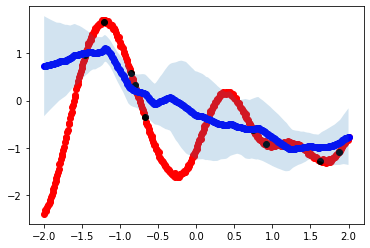

100%|██████████| 200000/200000 [52:54<00:00, 63.01it/s]


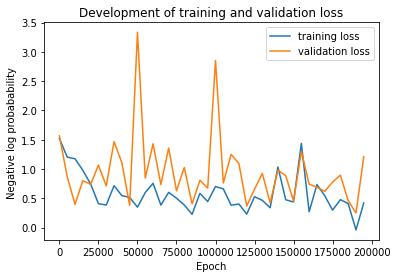

In [19]:
model_weights = trainer.run_training(**default_conf['training_params'])